# Семинар №4. Метрики и Поиск

Итак, нам надо выбрать такое пространство алгоритмов $\mathbb{A}$ и функционал минимизации $Q(a, X_{train}, y_{train})$, чтобы решать задачу машинного обучения:

$$a(x) = argmin_{a \in \mathbb{A}}Q(a, X_{train}, y_{train})$$

Обычно алгоритм сам знает какой функционал ему минимизировать, либо мы можем его поменять в гиперпараметрах алгоритма.

Однако, в данных могут случаться `шумы` и `выбросы` из-за этого корректное решение уравнения выше, может привести к `переобучению`. 

Чтобы избежать данной проблемы необходимо искусственно ограничивать пространство допустимых алгоритмов с помощью гиперпараметров (например: `длину дерево` в дереве решений).

Гиперпараметры существуют с 2мя целями: 

 * Менять функционал качества 
 * Ограничивать пространство выбора алгоритмов

## Вопрос, как выбрать наилучшие гиперпараметры?

## Матрица ошибок. Двухклассовая классификация
- $TP$ = кол-во пар, где: $y_{predicted} = 1$, $y_{real} = 1$
- $FP$ = кол-во пар, где: $y_{predicted} = 1$, $y_{real} = 0$ (ошибки первого рода)
- $TN$ = кол-во пар, где: $y_{predicted} = 0$, $y_{real} = 0$
- $FN$ = кол-во пар, где: $y_{predicted} = 0$, $y_{real} = 1$ (ошибки второго рода)

Первая буква - совпадает ли реальность с классификацией. Вторая - Что выдал классификатор.


<center>
<img src='confusionMatrxiUpdated.jpg' width = "500">
</center>

In [3]:
y_real = np.array([0, 1, 0, 0, 1, 1, 1, 1])
y_pred = np.array([0, 1, 1, 0, 1, 1, 0, 0])

M = metrics.confusion_matrix(y_real, y_pred)
M

array([[2, 1],
       [2, 3]])

## Характеристики бинарного классификатора

$$accuracy = ACC = \frac{TP + TN}{TP + TN + FP + FN}$$

$$recall = TPR = \frac{TP}{TP + FN},\quad SPC = \frac{TN}{TN + FP}$$

$$precision = PPV = \frac{TP}{TP + FP},\quad FPR= \frac{FP}{TN + FP},$$

$$F_1 = 2\frac{PPV\cdot TPR}{PPV + TPR}, \quad F_{\beta} = (1 + \beta^2)\frac{PPV\cdot TPR}{\beta^2PPV + TPR}$$

$ACC$ (`Accuracy`) - доля верно классифицированных примеров среди всех примеров. Основная характеристика качества классификации.

$TPR$ (True positive rate, `recall`) - доля верно классифицированных положительных примеров среди всех положительных примеров.

$SPC$ (Specificity, true negative rate) - доля верно классифицированных отрицательных примеров среди всех отрицательных примеров.

$PPV$ (Positive predictive value, `precision`) - доля верно классифицированных положительных примеров среди всех примеров, классифицированных положительно.

$FPR$ (False positive rate) - доля ошибочно классифицированных отрицательных примеров среди всех отрицательных примеров.

$F_1$ (F1-measure) - среднее гармоническое точности и полноты. Позволяет учесть обе характеристики одновременно.


$F_{beta}$ (Fbeta-measure) - $F_1$ c возможностью контроллировать важность точности или полноты относительно друг друга.




In [5]:
accuracy = metrics.accuracy_score(y_real, y_pred)
recall = metrics.recall_score(y_real, y_pred)
precision = metrics.precision_score(y_real, y_pred)
f1 = metrics.f1_score(y_real, y_pred)
fb = metrics.fbeta_score(y_real, y_pred, beta=2)
print('accuracy: {}'.format(accuracy))
print('recall: {}'.format(recall))
print('precision: {}'.format(precision))
print('F1: {}'.format(f1))
print('Fb: {}'.format(fb))

accuracy: 0.625
recall: 0.6
precision: 0.75
F1: 0.6666666666666665
Fb: 0.625


## Другие материки качества
Существет еще много других метрик для бинарной классификации, например

$$LogLoss = -\frac{1}{n}\sum_{i=1}^{l}(y_{real}^{(i)}\log(y_{pred}^{(i)}) + (1-y_{real}^{(i)})\log(1-y_{pred}^{(i)}))$$

$$brierloss = \sum_{i=1}^{n}(y_{real}^{(i)} - y_{pred}^{(i)})^2$$

Выбирать метрику нужно **исходя из задачи**, ведь каждая работает по своему и находит свое лучшее решение.

Логлосс например учитывает доли правильных и неправильных ответов, но сильно штрафует за уверенность классификатора в неверном ответе.

### Пример. Наша самодельная классификация

In [38]:
from sklearn.model_selection import train_test_split
np.random.seed(1337)
n = 1000
a = np.random.normal(loc=0, scale=0.7, size=(n, 2)) #первый класс
b = np.random.normal(loc=1, scale=0.7, size=(n, 2)) #второй класс
X = np.vstack([a, b]) #двумерный количественный признак
y = np.hstack([np.zeros(n), np.ones(n)]) #бинарный признак

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

(1800, 2) (1800,)


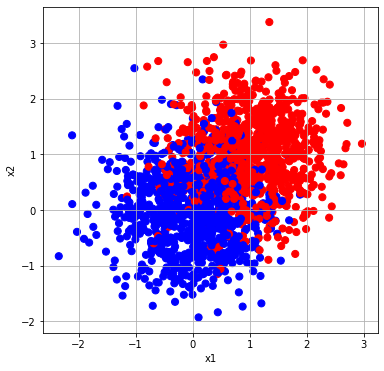

In [39]:
print(X_train.shape, y_train.shape)
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=50, alpha=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier as KNN
clf = KNN(10)

И проведем кроссвалидацию по 3-м разным метрикам. В том числе напишем свою. 

In [41]:
acc_score = cross_val_score(clf, X_train, y_train, cv=5, 
                            scoring=metrics.scorer.accuracy_scorer)

nll = cross_val_score(clf, X_train, y_train, cv=5, 
                      scoring=metrics.scorer.neg_log_loss_scorer)

def my_score(y, y_pred):
    return ((y_pred - y)**2).sum()

my_score = cross_val_score(clf, X_train, y_train, cv=5, 
                           scoring=metrics.make_scorer(my_score))

In [42]:
acc_score, nll, my_score

(array([0.82548476, 0.8       , 0.81666667, 0.85      , 0.83286908]),
 array([-0.53062417, -1.02532309, -1.27380355, -0.59786643, -0.79783006]),
 array([63., 72., 66., 54., 60.]))

## [ROC-кривая и AUC](https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0)

Пусть наш алгоритм предсказывает не только значения, но и **вероятности** получить то или иное значение. Возьмем массив вероятностей получить 1.

In [43]:
model = clf.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)
y_prob1 = y_prob[:,1]

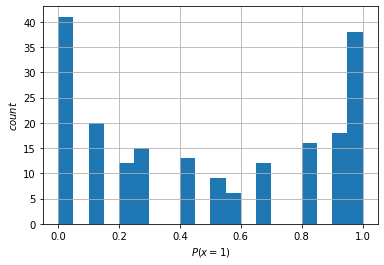

In [44]:
plt.hist(y_prob1, bins=20)
plt.xlabel('$P(x = 1)$')
plt.ylabel('$count$')
plt.grid()

А теперь разделим на наши классы, которые верно классифицировались и не верно классифицировались.

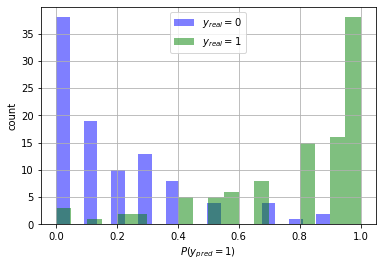

In [45]:
table = np.hstack((y_prob1.reshape((-1,1)), y_test.reshape((-1,1))))
zero_pred = table[table[:,1]==0]
ones_pred = table[table[:,1]==1]
plt.hist(zero_pred[:,0], bins=20, color='blue', alpha=0.5, label='$y_{real}=0$')
plt.hist(ones_pred[:,0], bins=20, color='green', alpha=0.5, label='$y_{real}=1$')
plt.ylabel('count')
plt.xlabel('$P(y_{pred} = 1)$')
plt.legend()
plt.grid()

### ROC-кривая и AUC

**ROC-кривая** (Receiver Operating Characteristic) - это графическая характеристика качества бинарного классификатора, выражающая зависимость `TPR` от `FPR` при варьировании порога решающего правила.

**Порог решающего правила**(`threshold`): при какой вероятности мы присваиваем объекту класс 1.

Мы двигаемся справа налево и считаем `TPR` и `FPR` следующим образом: 
* TP - зеленые справа от порога.
* FP - синие справа от порога.
* TN - синие слева от порога.
* FN - зеленые слева от порога.

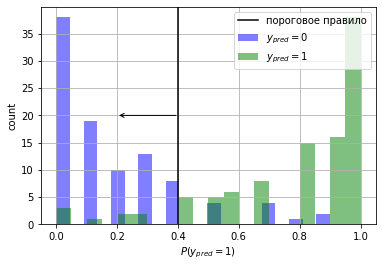

In [46]:
table = np.hstack((y_prob1.reshape((-1,1)), y_test.reshape((-1,1))))
zero_pred = table[table[:,1]==0]
ones_pred = table[table[:,1]==1]
plt.hist(zero_pred[:,0], bins=20, color='blue', alpha=0.5, label='$y_{pred}=0$')
plt.hist(ones_pred[:,0], bins=20, color='green', alpha=0.5, label='$y_{pred}=1$')
plt.axvline(x=0.4, c='black', label='пороговое правило')
plt.annotate("", xy=(0.2, 20), xytext=(0.4, 20), arrowprops=dict(arrowstyle="->"))
plt.ylabel('count')
plt.xlabel('$P(y_{pred} = 1)$')
plt.legend()
plt.grid()

Так пройдя все возможные значения для `TPR` и `FPR` мы получим несколько координат точек, по которым сможем нарисовать ROC кривую.

Функция, которая за нас все посчитает: 

In [50]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_prob1)

In [51]:
fpr, tpr

(array([0.        , 0.        , 0.02020202, 0.03030303, 0.07070707,
        0.07070707, 0.11111111, 0.19191919, 0.32323232, 0.42424242,
        0.61616162, 1.        ]),
 array([0.        , 0.37623762, 0.53465347, 0.68316832, 0.76237624,
        0.82178218, 0.87128713, 0.92079208, 0.94059406, 0.96039604,
        0.97029703, 1.        ]))

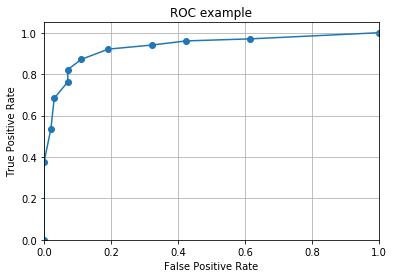

In [48]:
plt.figure()
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC example')
plt.grid()
plt.show()

ROC-кривая проходит через точки (0, 0) и (1, 1) и монотонно не убывает. Чем ближе кривая внутри квадрата $[0, 1]\times[0, 1]$ к левому верхнему углу, тем лучше. Идеальный вариант - кривая, проходящая через три точки: (0, 0), (1, 1) и (0, 1). Диагональ данного квадрата соответствует случайному гаданию.

#### AUC - площадь под графиком ROC. Это основной показатель качества классификации.

In [49]:
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.9327932793279328

### А что будет, если у нас классы будут полностью пересекаться?

In [20]:
np.random.seed(1337)
n = 1000
a = np.random.normal(loc=0, scale=0.7, size=(n, 2)) #первый класс
b = np.random.normal(loc=0, scale=0.7, size=(n, 2)) #второй класс
X = np.vstack([a, b]) #двумерный количественный признак
y = np.hstack([np.zeros(n), np.ones(n)]) #бинарный признак

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

(1800, 2) (1800,)


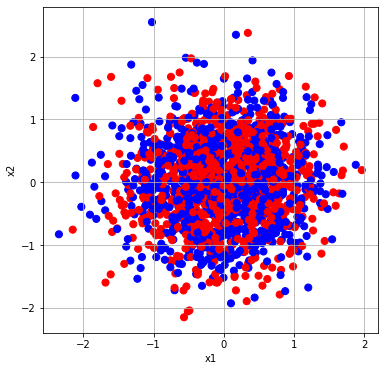

In [21]:
print(X_train.shape, y_train.shape)
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=50, alpha=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

In [22]:
model = clf.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)
y_prob1 = y_prob[:,1]

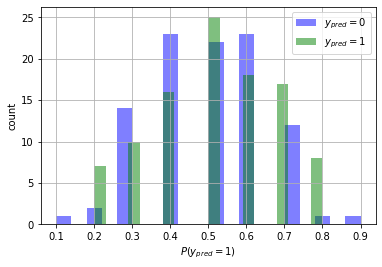

In [23]:
table = np.hstack((y_prob1.reshape((-1,1)), y_test.reshape((-1,1))))
zero_pred = table[table[:,1]==0]
ones_pred = table[table[:,1]==1]
plt.hist(zero_pred[:,0], bins=20, color='blue', alpha=0.5, label='$y_{pred}=0$')
plt.hist(ones_pred[:,0], bins=20, color='green', alpha=0.5, label='$y_{pred}=1$')
plt.ylabel('count')
plt.xlabel('$P(y_{pred} = 1)$')
plt.legend()
plt.grid()

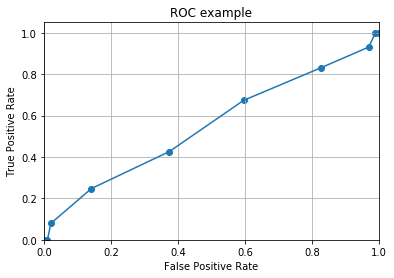

In [24]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_prob1)
plt.figure()
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC example')
plt.grid()
plt.show()

Roc близка к диагонали - это значит, что классификатор распределяет классы не лучше случайно подброшенной монетки. С вероятностью $0.5$ у нас может появиться любой класс.

In [25]:
np.random.seed(1337)
n = 1000
a = np.random.normal(loc=0, scale=0.7, size=(n, 2)) #первый класс
b = np.random.normal(loc=5, scale=0.7, size=(n, 2)) #второй класс
X = np.vstack([a, b]) #двумерный количественный признак
y = np.hstack([np.zeros(n), np.ones(n)]) #бинарный признак

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

(1800, 2) (1800,)


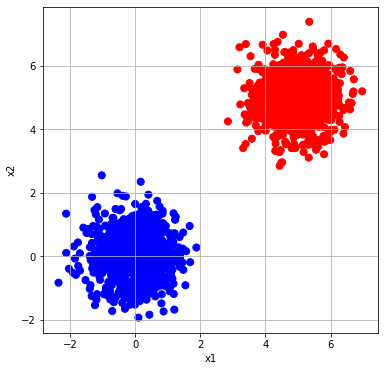

In [26]:
print(X_train.shape, y_train.shape)
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=50, alpha=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

In [27]:
model = clf.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)
y_prob1 = y_prob[:,1]

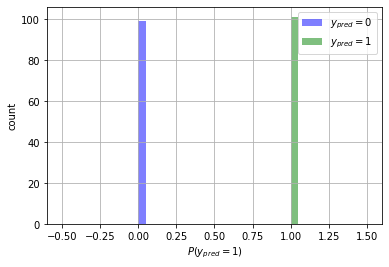

In [28]:
table = np.hstack((y_prob1.reshape((-1,1)), y_test.reshape((-1,1))))
zero_pred = table[table[:,1]==0]
ones_pred = table[table[:,1]==1]
plt.hist(zero_pred[:,0], bins=20, color='blue', alpha=0.5, label='$y_{pred}=0$')
plt.hist(ones_pred[:,0], bins=20, color='green', alpha=0.5, label='$y_{pred}=1$')
plt.ylabel('count')
plt.xlabel('$P(y_{pred} = 1)$')
plt.legend()
plt.grid()

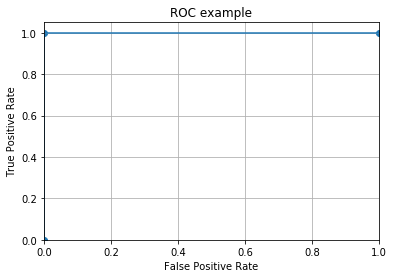

In [29]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_prob1)
plt.figure()
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC example')
plt.grid()
plt.show()

Roc-кривая близка к диагонали, что означает, что наш классификатор бесполезен и работает не лучше рандома.

## Регрессия

Для регрессии также существуют свои метрики качества, например 
$$R^2 = 1 - \frac{\sum_{i=1}^{n}(a(x^{(i)}) - y^{(i)}_{real})^2}{\sum_{i=1}^{n}(y^{(i)}_{real} - \overline{y})^2}\quad \overline{y} = \frac{1}{n}\sum_{i=1}^{n}y_i$$

Вызывается она аналогичным образом

In [262]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
metrics.r2_score(y_true, y_pred)  

0.9486081370449679

# Кросс-валидация

<img src=https://i.stack.imgur.com/YWgro.gif>

`Идея`: разобъем нашу выборку на 5 равнозначных частей. Одну часть - сделаем тестовой выборкой, а оставшееся оставим в тренировачной выборке. Таким образом мы получим 5 комбинаций тренировачных и тестовых выборок. 

А теперь обучим наш алгоритм 5 раз на разных выборках и посмотрим `насколько хорошо` предсказывает наш алгоритм результат для разных выборок.

В случае классификации под `настолько хорошо` будем обозначать **долю правильных ответов** (`accuracy`). А вообще это целая большая тема под названием `Метрики`, которой мы займемся в следующий раз.

In [99]:
from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(clf_1, X = iris.data, y=iris.target, cv=5)
accuracies2 = cross_val_score(clf_2, X = iris.data, y=iris.target, cv=5)

In [101]:
accuracies1.mean()

0.9333333333333332

Получаем, что в среднем более глубокое дерево для Iris, работает лучше.

### А вообще можно взять и перебрать все значения гиперпараметра, чтобы найти наилучший результат.

## GridSearch

Перебираем значения параметра и считаем `результат` для классификатора. 

`Результат` - среднее значение кроссвалидации.

In [3]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.datasets import load_iris # в sklearn есть встроенные датасеты
iris=load_iris()
params = {'max_depth': np.arange(1, 100)}

gs = GridSearchCV(
        estimator = DTC(), #классификатор
        param_grid = params, # передираемый параметр
        cv = 5, #кросс-валидация
        scoring = 'accuracy' #результат - доля правильных ответов
    )

In [4]:
gs.fit(iris.data, iris.target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n...
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 

In [5]:
type(gs.cv_results_)

dict

# Random Search
![title](https://i.stack.imgur.com/cIDuR.png)

`GridSearch` - это честный перебор всех параметров, который может оказаться очень долгим. На самом деле можно двигаться гораздо быстрее с помощью RandomizedSearch.
Алгоритм:
* Выбираем рандомную точку $x$ в пространстве заданных параметров
* Пока не кончится количество итераций(заданное заранее)
  * Выбираем новую точку $y$ c помощью 
  * Если $f(y) < f(x)$, то x = y

In [135]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris # в sklearn есть встроенные датасеты

iris=load_iris()
params = {'max_depth': np.arange(1, 100)}
rs = RandomizedSearchCV(
        estimator = DTC(), #классификатор
        param_distributions = params, # передираемый параметр
        cv = 5, #кросс-валидация
        scoring = 'accuracy' #результат - доля правильных ответов
    )
rs.fit(iris.data, iris.target)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [502]:
pd.DataFrame(rs.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.000385,0.000096,0.000233,6.893891e-05,77,{'max_depth': 77},0.966667,0.966667,0.9,1.0,1.0,0.966667,0.036515,1
6,0.000295,0.000007,0.000188,9.887906e-07,11,{'max_depth': 11},0.966667,0.966667,0.9,1.0,1.0,0.966667,0.036515,1
7,0.000308,0.000013,0.000193,4.372885e-06,15,{'max_depth': 15},0.966667,0.966667,0.9,1.0,1.0,0.966667,0.036515,1


Обычно `RandomSearch` работает слегка хуже, но гораздо быстрее `GridSearch`, поэтому тут ваш выбор: либо точный результат, либо скорость.

Получили наилучшую глубину дерева - 3. С результатом 0.973333

## Полезные ссылки:
* [Model Tuning Grid, Random Search](https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search)
* [Статья про метрики](https://habrahabr.ru/company/ods/blog/328372/)
* [Roc-auc](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)
* [Связь AUC-ROC и AUC-PR](http://pages.cs.wisc.edu/~jdavis/davisgoadrichcamera2.pdf)
* [Ultimate guide to Binary Classifiction Metrics](https://towardsdatascience.com/the-ultimate-guide-to-binary-classification-metrics-c25c3627dd0a)

- [Статья](http://habrahabr.ru/post/228963/) "Как заставить работать бинарный классификатор чуточку лучше" на Habrahabr
- [ROC-кривая](http://www.machinelearning.ru/wiki/index.php?title=ROC-%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F)
- [Характеристики](https://en.wikipedia.org/wiki/Precision_and_recall) бинарного классификатора
- [One vs. All и One vs. One](https://en.wikipedia.org/wiki/Multiclass_classification)
- [Quora](https://www.quora.com/In-classification-how-do-you-handle-an-unbalanced-training-set) про несбаланированные выборки
- про несбаланированные выборки на [ресурсе](http://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/) Machine Learning Mastery

## Источники материалов:
* [mlcourse.ai](https://github.com/Yorko/mlcourse.ai) - курс Машинного обучения с OpenDataScience
* [AI Seminars](https://github.com/AICommunityInno/Seminars) - семинары по Машинному обучению в Иннополисе
* [HSE-ML course](https://github.com/esokolov/ml-course-hse) - курс Машинного обучения ФКН ВШЭ